In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

C:\Users\subha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\subha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\subha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('generated_data.xlsx')

In [4]:
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [5]:
df['Brand'].value_counts()

C11    7800
C3     6000
C10    4800
C9     3600
C7     3600
C6     3000
C2     1800
C4     1800
C1     1200
C5      600
C8      600
Name: Brand, dtype: int64

In [6]:
df['Acquisition'].value_counts()

2    5800
3    5800
1    5800
4    5800
5    5800
6    5800
Name: Acquisition, dtype: int64

In [7]:

df['Concentration_Class'].value_counts()

5     8700
10    8700
25    8700
50    8700
Name: Concentration_Class, dtype: int64

In [8]:
df['Concentration'].value_counts()

5     8700
10    8700
25    8700
50    8700
Name: Concentration, dtype: int64

In [9]:
df['Class'].value_counts()

Rewarewa        3600
ManukaUMF10     3600
Clover          3600
ManukaUMF5      3600
Multifloral     2400
ManukaUMF15     2400
Manuka          1800
Tawari          1800
ManukaBlend     1800
Rata            1200
Kamahi          1200
Pohu            1200
BB              1200
ManukaUMF20     1200
ManukaUMF13      600
BorageField      600
ManukaUMF12      600
ManukaUMF18      600
ManukaUMF22      600
Honeydew         600
Field+Tawari     600
Name: Class, dtype: int64

In [10]:
Y=df['Concentration']

In [11]:
Y.head()

0    5
1    5
2    5
3    5
4    5
Name: Concentration, dtype: int64

In [12]:
df.drop('Concentration',axis=1,inplace=True)

In [13]:
df.drop('Concentration_Class',axis=1,inplace=True)

In [14]:
df.head()

,Brand,Acquisition,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,0.551524,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,0.554449,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,0.551499,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,0.551494,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,0.556812,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [15]:
# Define the mapping dictionary
brand_mapping = {
    'C1': 1,
    'C2': 2,
    'C3': 3,
    'C4': 4,
    'C5': 5,
    'C6': 6,
    'C7': 7,
    'C8': 8,
    'C9': 9,
    'C10': 10,
    'C11': 11,
}

# Map the values in the 'Brand' column using the mapping dictionary
df['Brand'] = df['Brand'].map(brand_mapping)

In [16]:
df.head()

,Brand,Acquisition,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,11,2,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,0.551524,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,11,2,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,0.554449,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,11,2,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,0.551499,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,11,2,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,0.551494,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,11,2,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,0.556812,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [17]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [18]:
# Fit and transform the selected column
df['Class'] = label_encoder.fit_transform(df['Class'])

In [19]:
df.head()

,Brand,Acquisition,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,11,2,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,0.551524,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,19
1,11,2,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,0.554449,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,19
2,11,2,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,0.551499,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,19
3,11,2,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,0.551494,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,19
4,11,2,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,0.556812,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,19


In [20]:
df['Class'].value_counts()

19    3600
8     3600
2     3600
15    3600
16    2400
11    2400
6     1800
20    1800
7     1800
18    1200
5     1200
17    1200
0     1200
13    1200
10     600
1      600
9      600
12     600
14     600
4      600
3      600
Name: Class, dtype: int64

In [21]:
X=df

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42,shuffle=True)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_only=DecisionTreeClassifier(max_depth=9,max_features=8)
tree_only.fit(X_train,y_train)

y_pred=tree_only.predict(X_test)
accuracy_score(y_test, y_pred)

0.8922413793103449

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9982758620689656

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9994252873563219

In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='poly', degree=4) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6540229885057471

In [29]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[584 217  85   0]
 [403 306 135  13]
 [125  94 566 101]
 [  0   0  31 820]]


In [30]:
# Extract values from the confusion matrix
true_negatives = cm[0, 0]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]

In [31]:
# Calculate False Positive Rate (FPR)
fpr = false_positives / (false_positives + true_negatives)
print("False Positive Rate (FPR):", fpr)

False Positive Rate (FPR): 0.27091136079900124


In [32]:
# Calculate False Negative Rate (FNR)
fnr = false_negatives / (false_negatives + true_positives)
print("False Negative Rate (FNR):", fnr)

False Negative Rate (FNR): 0.5684062059238364


In [33]:
# Calculate Recall (True Positive Rate)
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)

Recall: 0.4315937940761636


In [34]:
# Calculate Precision
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Precision: 0.5850860420650096


In [35]:
from sklearn.metrics import fbeta_score

# Calculate the F-beta score with the 'macro' average option
beta = 2  # You can adjust the value of beta as needed
f_beta_macro = fbeta_score(y_test, y_pred, beta=beta, average='macro')
print(f"F-beta (beta={beta}, average='macro'):", f_beta_macro)

F-beta (beta=2, average='macro'): 0.6498655627740315


In [36]:
# F1-score = 2 * (Precision * Recall) / (Precision + Recall)
F1score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", F1score)

F1-score: 0.4967532467532468


In [37]:
# Calculate Cohen's Kappa
cohen_kappa_score(y_test, y_pred)

0.5384383031698659

In [38]:
a=0.2893106119287374
b=0.2939497716894977
c=0.28967813540510545

print("Round : " + str(round((a+b+c)/3,6)))
print((a+b+c)/3)

Round : 0.29098
0.2909795063411135


In [39]:
print(round(0.0018348502813393937,6))

0.001835


In [40]:
from sklearn.decomposition import PCA

pca = PCA(0.9999999)
X_pca = pca.fit_transform(X)
X_pca.shape

(34800, 33)

In [41]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.1, random_state=30)

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)
y_pred=model.predict(X_test_pca)

In [43]:
model.score(X_test_pca, y_test)

0.7933908045977012

# Random Forest

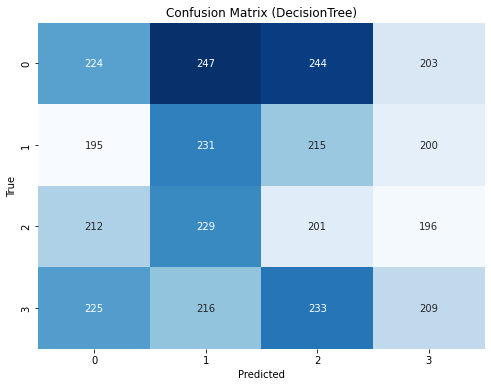

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (DecisionTree)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

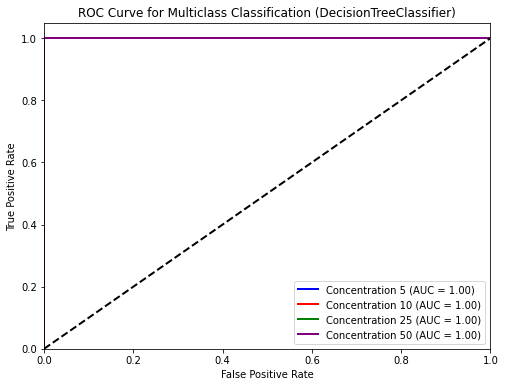

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Binarize the target variable for each class
y_bin = label_binarize(y_test, classes=[5, 10, 25, 50])
n_classes = y_bin.shape[1]

# Initialize a OneVsRestClassifier with DecisionTreeClassifier as the underlying classifier
classifier = OneVsRestClassifier(RandomForestClassifier())

# Fit the classifier for each class
y_score = classifier.fit(X_test, y_bin).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple']  # You can customize colors
concentrations = [5, 10, 25, 50]  # Specify the concentrations
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Concentration {concentrations[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (DecisionTreeClassifier)')
plt.legend(loc="lower right")
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score

import numpy as np

# Convert X_test to a NumPy array if it's a DataFrame
#if isinstance(X_test, pd.DataFrame):
#    X_testt = X_test.values


# Define the classes for which you want to calculate ROC AUC scores
classes = [5, 10, 25, 50]

# Initialize lists to store AUC values
roc_auc_values = []

# Calculate predicted probabilities for each class
y_probs = clf.predict_proba(X_test)

# Calculate AUC for each class
for class_label in classes:
    # Find the index corresponding to the class label
    class_index = list(clf.classes_).index(class_label)
    
    # Extract the predicted probabilities for the current class
    class_probs = y_probs[:, class_index]
    
    # Calculate ROC AUC for the current class
    auc = roc_auc_score(y_test == class_label, class_probs)
    
    # Append the AUC value to the list
    roc_auc_values.append(auc)

# Plot AUC values
plt.figure(figsize=(8, 6))
plt.bar(classes, roc_auc_values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('AUC')
plt.title('AUC for Each Class')
plt.xticks(classes)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each class
precisions = []
recalls = []
classes = [5, 10, 25, 50]

for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve((y_test == classes[i]).astype(int), y_probs[:, i])
    precisions.append(precision)
    recalls.append(recall)

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recalls[i], precisions[i], lw=2, label=f'Concentration {classes[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Decision Tree

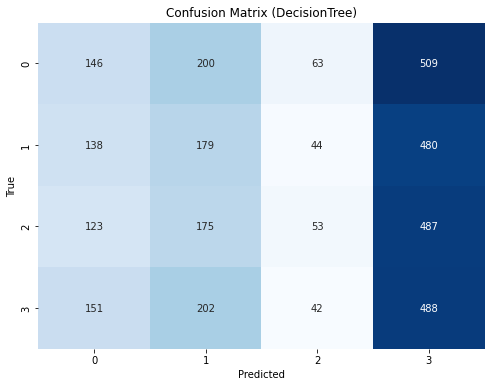

In [46]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_only=DecisionTreeClassifier(max_depth=9,max_features=8)
tree_only.fit(X_train,y_train)

y_pred=tree_only.predict(X_test)
accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (DecisionTree)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

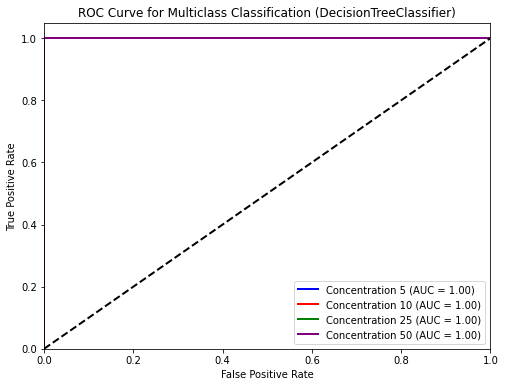

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

# Binarize the target variable for each class
y_bin = label_binarize(y_test, classes=[5, 10, 25, 50])
n_classes = y_bin.shape[1]

# Initialize a OneVsRestClassifier with DecisionTreeClassifier as the underlying classifier
classifier = OneVsRestClassifier(DecisionTreeClassifier())

# Fit the classifier for each class
y_score = classifier.fit(X_test, y_bin).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple']  # You can customize colors
concentrations = [5, 10, 25, 50]  # Specify the concentrations
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Concentration {concentrations[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (DecisionTreeClassifier)')
plt.legend(loc="lower right")
plt.show()

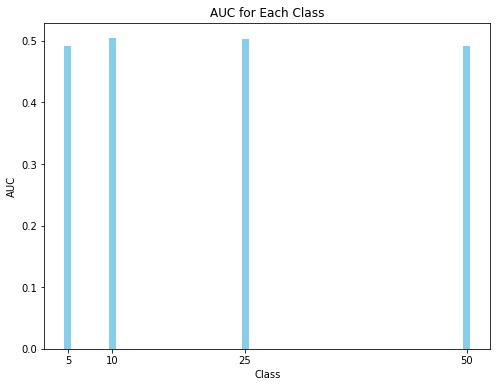

In [51]:
from sklearn.metrics import roc_auc_score

import numpy as np

# Convert X_test to a NumPy array if it's a DataFrame
#if isinstance(X_test, pd.DataFrame):
#    X_testt = X_test.values


# Define the classes for which you want to calculate ROC AUC scores
classes = [5, 10, 25, 50]

# Initialize lists to store AUC values
roc_auc_values = []

# Calculate predicted probabilities for each class
y_probs = tree_only.predict_proba(X_test)

# Calculate AUC for each class
for class_label in classes:
    # Find the index corresponding to the class label
    class_index = list(clf.classes_).index(class_label)
    
    # Extract the predicted probabilities for the current class
    class_probs = y_probs[:, class_index]
    
    # Calculate ROC AUC for the current class
    auc = roc_auc_score(y_test == class_label, class_probs)
    
    # Append the AUC value to the list
    roc_auc_values.append(auc)

# Plot AUC values
plt.figure(figsize=(8, 6))
plt.bar(classes, roc_auc_values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('AUC')
plt.title('AUC for Each Class')
plt.xticks(classes)
plt.show()

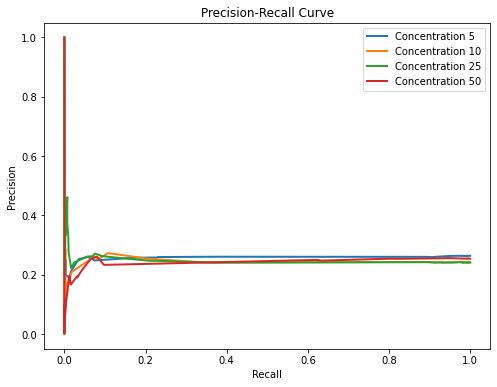

In [52]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each class
precisions = []
recalls = []
classes = [5, 10, 25, 50]

for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve((y_test == classes[i]).astype(int), y_probs[:, i])
    precisions.append(precision)
    recalls.append(recall)

# Plot PR curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recalls[i], precisions[i], lw=2, label=f'Concentration {classes[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()